In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from shutil import copyfile
import shutil
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import seaborn as sns
import random
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
source = "/content/drive/MyDrive/Chocolate Classification"

source_white_chocolate = os.path.join(source, "White Chocolate")
source_dark_chocolate = os.path.join(source, "Dark Chocolate")


print(f"There are {len(os.listdir(source_white_chocolate))} white chocolates.")
print(f"There are {len(os.listdir(source_dark_chocolate))} dark chocolates.")

There are 68 white chocolates.
There are 69 dark chocolates.


In [ ]:
# root directory
root = "/kaggle/working/white_chocolates-vs-dark_chocolates"
if os.path.exists(root):
    shutil.rmtree(root)

def create_train_val_dirs(root_path):

    os.makedirs(os.path.join(root,"training"))
    os.makedirs(os.path.join(f"{root}/training", "white chocolate"))
    os.makedirs(os.path.join(f"{root}/training", "dark chocolate"))
    os.makedirs(os.path.join(root,"validation"))
    os.makedirs(os.path.join(f"{root}/validation", "white chocolate"))
    os.makedirs(os.path.join(f"{root}/validation", "dark chocolate"))

try:
    create_train_val_dirs(root_path=root)
except FileExistsError:
    print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
for rootdir, dirs, files in os.walk(root):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/kaggle/working/white_chocolates-vs-dark_chocolates/training
/kaggle/working/white_chocolates-vs-dark_chocolates/validation
/kaggle/working/white_chocolates-vs-dark_chocolates/training/dark chocolate
/kaggle/working/white_chocolates-vs-dark_chocolates/training/white chocolate
/kaggle/working/white_chocolates-vs-dark_chocolates/validation/dark chocolate
/kaggle/working/white_chocolates-vs-dark_chocolates/validation/white chocolate


In [ ]:
#  Spliting data into train and test set
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

    processed_data = []

    for filename in os.listdir(SOURCE_DIR) :
        file = SOURCE_DIR + filename
        if os.path.getsize(file) > 0 :
            processed_data.append(filename)
        else :
            print(f"{filename} is zero length, so ignoring.")

    randomized_data = random.sample(processed_data, len(processed_data))

    training_length = int(len(randomized_data)*SPLIT_SIZE)
    validation_length = int(len(randomized_data) - training_length)

    training_data = randomized_data[:training_length]
    validation_data = randomized_data[-validation_length:]


    for filename in training_data :
        present_file = SOURCE_DIR + filename
        destination = TRAINING_DIR + filename
        copyfile(present_file, destination)


    for filename in validation_data :
        present_file = SOURCE_DIR + filename
        destination = VALIDATION_DIR + filename
        copyfile(present_file, destination)

In [ ]:
WHITE_CHOCOLATE_SOURCE = "/content/drive/MyDrive/Chocolate Classification/White Chocolate/"
DARK_CHOCOLATE_SOURCE = "/content/drive/MyDrive/Chocolate Classification/Dark Chocolate/"

TRAINING_DIR = "/kaggle/working/white_chocolates-vs-dark_chocolates/training/"
VALIDATION_DIR = "/kaggle/working/white_chocolates-vs-dark_chocolates/validation/"

TRAINING_WHITE_CHOCOLATE_DIR = os.path.join(TRAINING_DIR, "white chocolate/")
VALIDATION_WHITE_CHOCOLATE_DIR = os.path.join(VALIDATION_DIR, "white chocolate/")

TRAINING_DARK_CHOCOLATE_DIR = os.path.join(TRAINING_DIR, "dark chocolate/")
VALIDATION_DARK_CHOCOLATE_DIR = os.path.join(VALIDATION_DIR, "dark chocolate/")

# Empty directories in case running this cell multiple times
if len(os.listdir(TRAINING_WHITE_CHOCOLATE_DIR)) > 0:
    for file in os.scandir(TRAINING_WHITE_CHOCOLATE_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_DARK_CHOCOLATE_DIR)) > 0:
    for file in os.scandir(TRAINING_DARK_CHOCOLATE_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_WHITE_CHOCOLATE_DIR)) > 0:
    for file in os.scandir(VALIDATION_WHITE_CHOCOLATE_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_DARK_CHOCOLATE_DIR)) > 0:
    for file in os.scandir(VALIDATION_DARK_CHOCOLATE_DIR):
        os.remove(file.path)

split_size = .9

split_data(WHITE_CHOCOLATE_SOURCE, TRAINING_WHITE_CHOCOLATE_DIR, VALIDATION_WHITE_CHOCOLATE_DIR, split_size)
split_data(DARK_CHOCOLATE_SOURCE, TRAINING_DARK_CHOCOLATE_DIR, VALIDATION_DARK_CHOCOLATE_DIR, split_size)

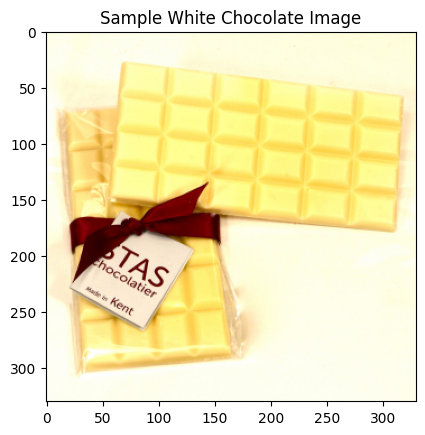

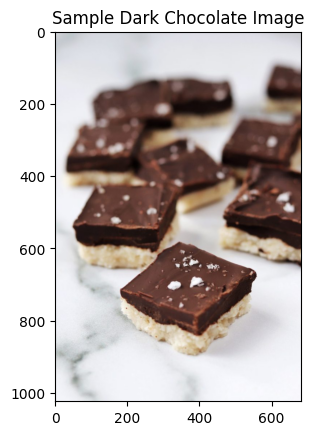

In [ ]:
plt.imshow(load_img(f"{os.path.join(TRAINING_WHITE_CHOCOLATE_DIR, os.listdir(TRAINING_WHITE_CHOCOLATE_DIR)[0])}"))
plt.title("Sample White Chocolate Image")
plt.show()

plt.imshow(load_img(f"{os.path.join(TRAINING_DARK_CHOCOLATE_DIR, os.listdir(TRAINING_DARK_CHOCOLATE_DIR)[4])}"))
plt.title("Sample Dark Chocolate Image")
plt.show()

In [ ]:
image_sample  = load_img(f"{os.path.join(TRAINING_WHITE_CHOCOLATE_DIR, os.listdir(TRAINING_WHITE_CHOCOLATE_DIR)[0])}")

array_sample = img_to_array(image_sample)

print(f"First sample image has shape: {array_sample.shape}")

First sample image has shape: (330, 330, 3)


In [ ]:
# dark chocolate
image_sample  = load_img(f"{os.path.join(TRAINING_DARK_CHOCOLATE_DIR, os.listdir(TRAINING_DARK_CHOCOLATE_DIR)[0])}")

array_sample = img_to_array(image_sample)

print(f"Second sample image has shape: {array_sample.shape}")

Second sample image has shape: (598, 900, 3)


Data augmentatio

In [ ]:
def train_val_generators2(TRAINING_DIR, VALIDATION_DIR):

    train_datagen2 = ImageDataGenerator(rescale=1.0/255.0,
                                     rotation_range = 40,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True,
                                     vertical_flip = True)

    train_generator2 = train_datagen2.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=10,
                                                      class_mode="binary",
                                                      target_size=(400, 400))


    validation_datagen2 = ImageDataGenerator(rescale=1.0/255)

    validation_generator2 = validation_datagen2.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=2,
                                                                class_mode="binary",
                                                                target_size=(400, 400))


    return train_generator2, validation_generator2

In [ ]:
train_generator2, validation_generator2 = train_val_generators2(TRAINING_DIR, VALIDATION_DIR)

Found 123 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [ ]:
def create_model():

    model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(16, (3,3), activation = "relu", input_shape = (400,400,3)),
            tf.keras.layers.MaxPool2D(2,2),
            tf.keras.layers.Conv2D(32, (3,3), activation = "relu"),
            tf.keras.layers.MaxPool2D(2,2),
            tf.keras.layers.Conv2D(64, (3,3), activation = "relu"),
            tf.keras.layers.MaxPool2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation = "relu"),
            tf.keras.layers.Dense(1, activation = "sigmoid")
            ])

    from tensorflow.keras.optimizers import RMSprop

    model.compile(optimizer = RMSprop(learning_rate = 0.001),
                  loss = "binary_crossentropy",
                  metrics = ['accuracy'])


    return model

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):

        if(logs.get('accuracy') == 1.0):
            print("\nAccuracy is 100% so canceling training!")
            self.model.stop_training = True

callbacks = myCallback()

Training

In [ ]:
model2 = create_model()

history2 = model2.fit(train_generator2,
                    epochs=50,
                    verbose=1,
                    validation_data=validation_generator2,
                    callbacks=[callbacks])

Epoch 1/50
13/13 [==============================] - 8s 547ms/step - loss: 14.5080 - accuracy: 0.4878 - val_loss: 0.6707 - val_accuracy: 0.6429
Epoch 2/50
13/13 [==============================] - 6s 452ms/step - loss: 0.7189 - accuracy: 0.5366 - val_loss: 0.6110 - val_accuracy: 0.9286
Epoch 3/50
13/13 [==============================] - 7s 575ms/step - loss: 0.6622 - accuracy: 0.6260 - val_loss: 0.5858 - val_accuracy: 0.7857
Epoch 4/50
13/13 [==============================] - 6s 439ms/step - loss: 0.7081 - accuracy: 0.6504 - val_loss: 1.3252 - val_accuracy: 0.5000
Epoch 5/50
13/13 [==============================] - 7s 550ms/step - loss: 0.6819 - accuracy: 0.6911 - val_loss: 0.2604 - val_accuracy: 0.9286
Epoch 6/50
13/13 [==============================] - 6s 487ms/step - loss: 0.9361 - accuracy: 0.6667 - val_loss: 0.4370 - val_accuracy: 0.7857
Epoch 7/50
13/13 [==============================] - 7s 555ms/step - loss: 0.5886 - accuracy: 0.8049 - val_loss: 0.2469 - val_accuracy: 0.9286
Epoch

In [ ]:
model2.save("/content/drive/MyDrive/Chocolate Classification/chocolaty.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
